# CHURN PREDICTION FOR BANK CUSTOMERS

## DATA

This is a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. Therefore, the study will try to predict behaviors/attributes to retain bank customers.
This is the data from kaggle https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling?datasetId=156197&sortBy=voteCount

The data set includes information about:

-Customers who left bank – the column is called "Exited"
-Customer account information that each customer has 'creditscore', 'balance', 'numofproducts', 'hascrcard', 'isactivemember'.
-Demographic info about customers – surname, geography, gender, age range, tenure and 'estimatedsalary'.

### About The Features 

The features in the given dataset are:

rownumber: Row Numbers from 1 to 10000.

customerid: A unique ID that identifies each customer.

surname: The customer’s surname.

creditscore: A credit score is a number between 300–850 that depicts a consumer's creditworthiness.

geography: The country from which the customer belongs to.

Gender: The customer’s gender: Male, Female

Age: The customer’s current age, in years, at the time of being customer.

tenure: The number of years for which the customer has been with the bank.

balance: Bank balance of the customer.

numofproducts: the number of bank products the customer is utilising.

hascrcard: The number of credit cards given to the customer by the bank.

isactivemember: Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")

exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

## LIBRARIES 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## ANALYSIS 

### Reading The Data

In [2]:
data = pd.read_csv(r"C:\Users\DELL\Documents\Python\Datasets\Capstone project\Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.shape

(10000, 14)

### Exploratory Data Analysis(EDA) 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


###  Missing Values 

In [8]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Let's remove the columns of "rownumber", "customerid", "surname" from the given dataset

In [3]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Correlation  

<AxesSubplot:>

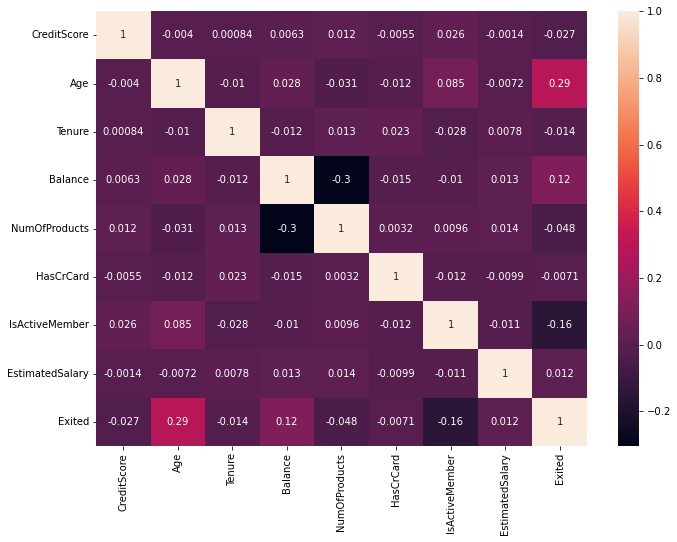

In [4]:
f, ax = plt.subplots(figsize=(11, 8)) 
sns.heatmap(data.corr(),annot=True)

From heatmap we can see there no strong correlation among features

### Tenure and Exited

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


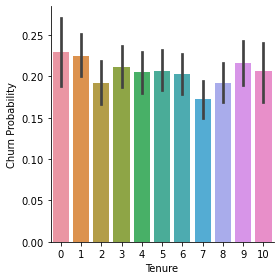

In [19]:
g= sns.factorplot(x = "Tenure", y = "Exited", data = data, kind = "bar", size = 4)
g.set_ylabels("Churn Probability")
plt.show()

In the mid tenure level there is less exit.

### Gender and Exited

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


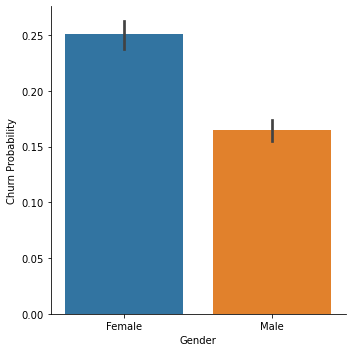

In [20]:
g= sns.factorplot(x = "Gender", y = "Exited", data = data, kind = "bar", size = 5)
g.set_ylabels("Churn Probability")
plt.show()

Females exits more.

### Geography and Exited

In [42]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [43]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Geography', ylabel='count'>

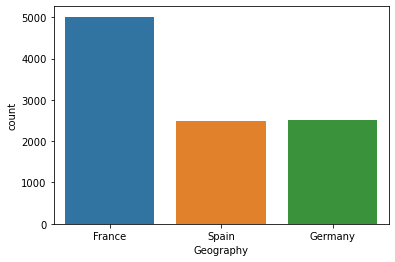

In [44]:
sns.countplot(data['Geography'])

People from Germany exits more.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-p

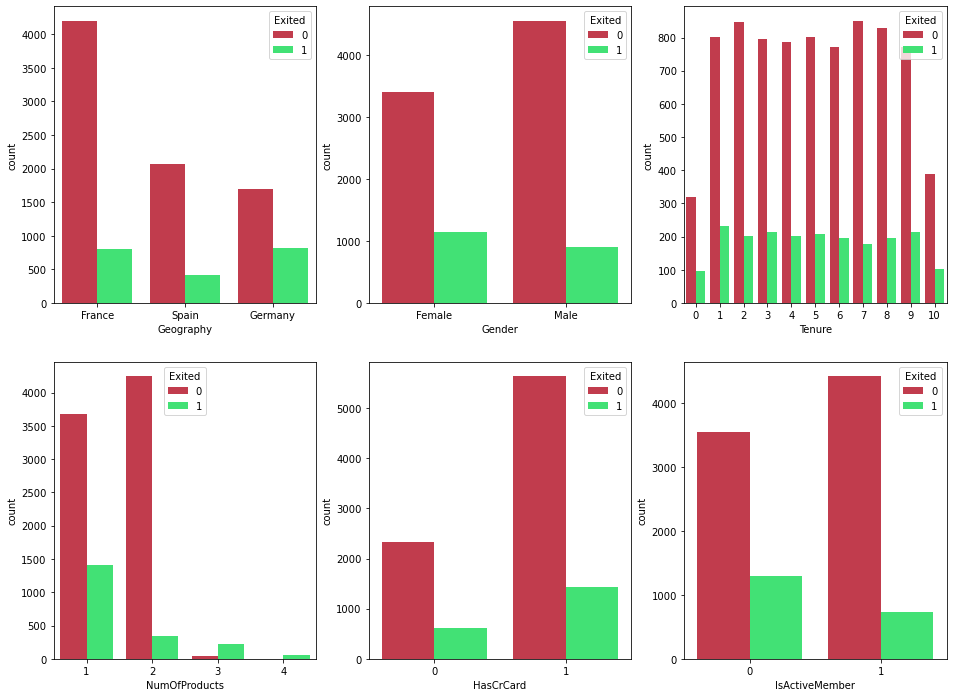

In [5]:
fig_data=['Geography', 'Gender', 'Tenure','NumOfProducts', 'HasCrCard', 
                  'IsActiveMember']
q=1
plt.figure(figsize=(16,12))
# Plot a grid with count plots of all categorical variables
for j in fig_data:
    plt.subplot(2,3,q)
    ax=sns.countplot(data[j],hue=data.Exited, palette=['#D7263D','#27FB6B'])
    plt.xlabel(j)
    q+=1
plt.show()

### Age versus Exited

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


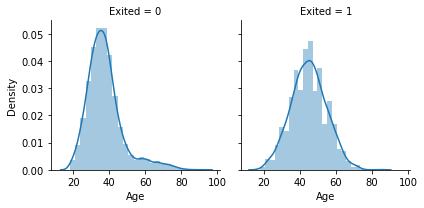

In [21]:
 g= sns.FacetGrid(data, col = "Exited")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

### Balance versus Exited

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


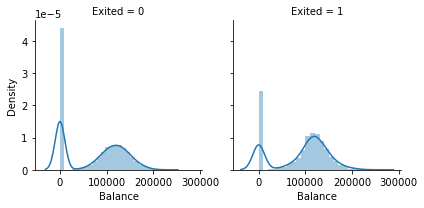

In [22]:
g= sns.FacetGrid(data, col = "Exited")
g.map(sns.distplot, "Balance", bins = 25)
plt.show()

### EstimatedSalary versus Exited


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


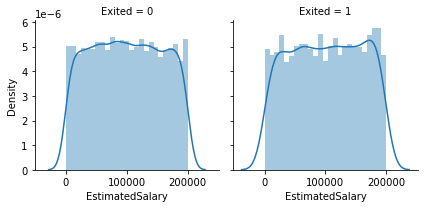

In [24]:
g= sns.FacetGrid(data, col = "Exited")
g.map(sns.distplot, "EstimatedSalary", bins = 25)
plt.show()

Although the they are similar, there seems to be slightly higher salaries for the exited customers.

### Creditscore versus Exited


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


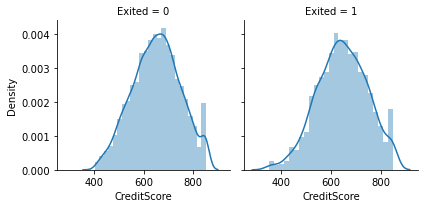

In [25]:
g= sns.FacetGrid(data, col = "Exited")
g.map(sns.distplot, "CreditScore", bins = 25)
plt.show()

### Outliers 

In [6]:
numerical= data.drop(['Exited'], axis=1).select_dtypes('number').columns
numerical

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

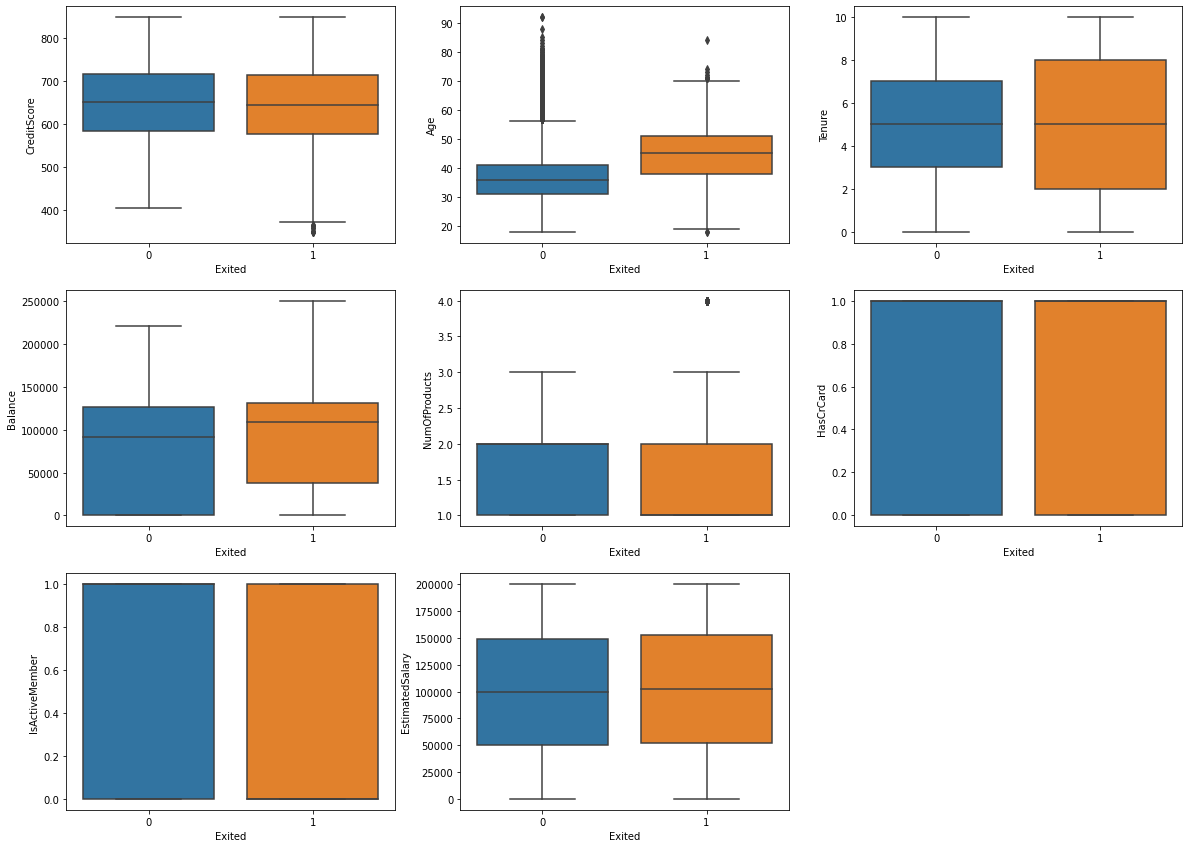

In [8]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "Exited":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='Exited', y=feature, data=data)

## Encoding Categorical Data

In [9]:
data = pd.get_dummies(data,drop_first=True)

In [49]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


## Checking for Imbalanced Data

In [50]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


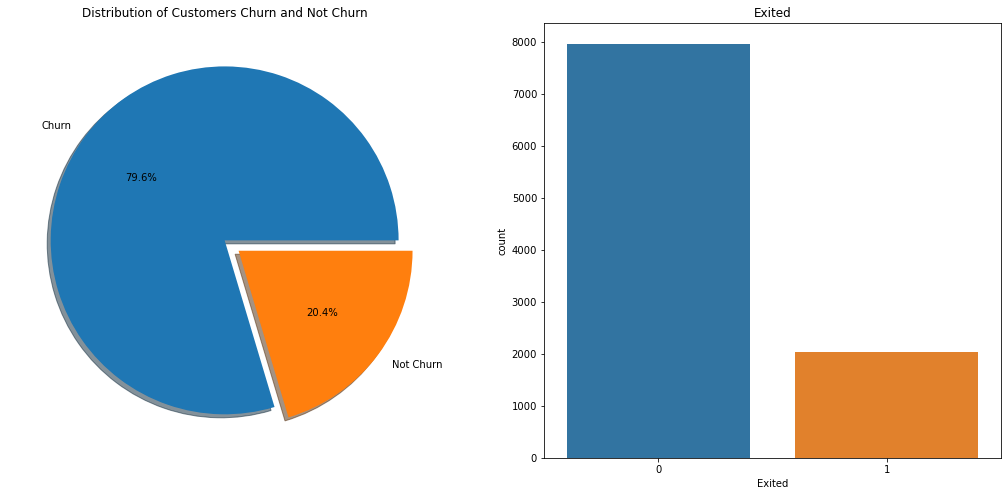

In [11]:
labels = 'Churn', 'Not Churn'
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Exited'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',labels=labels,ax=ax[0],shadow=True)
ax[0].set_title('Distribution of Customers Churn and Not Churn')
ax[0].set_ylabel('')
sns.countplot('Exited',data=data,ax=ax[1])
ax[1].set_title('Exited')
plt.show()

In [12]:
X = data.drop('Exited',axis=1)
y = data['Exited']

## Handling Imbalanced Data with SMOTE 

In [13]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [14]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

## Splitting the Dataset to Train & Test set

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [16]:
X_train,X_test,y_train,y_test

(       CreditScore  Age  Tenure       Balance  NumOfProducts  HasCrCard  \
 13555          616   44       4  102009.13350              1          0   
 1665           749   42       1  129776.72000              2          0   
 14878          738   48       1       0.00000              1          1   
 7471           658   55       8  119327.93000              1          0   
 2582           656   46       5  113402.14000              2          1   
 ...            ...  ...     ...           ...            ...        ...   
 13418          546   48       2       0.00000              1          0   
 5390           735   38       1       0.00000              3          0   
 860            667   43       8  190227.46000              1          1   
 15795          557   49       5  125960.08281              1          1   
 7270           697   51       1  147910.30000              1          1   
 
        IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
 13555 

## Feature Scaling

In [17]:
sc = StandardScaler()

In [18]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train

array([[-0.35755879,  0.30690626, -0.29217365, ..., -0.58278854,
        -0.46050359,  1.18137101],
       [ 1.09655082,  0.10667142, -1.39279229, ..., -0.58278854,
        -0.46050359,  1.18137101],
       [ 0.97628612,  0.70737594, -1.39279229, ..., -0.58278854,
        -0.46050359, -0.84647413],
       ...,
       [ 0.20003211,  0.20678884,  1.17531788, ..., -0.58278854,
        -0.46050359,  1.18137101],
       [-1.00261494,  0.80749336,  0.07469923, ..., -0.58278854,
        -0.46050359, -0.84647413],
       [ 0.52802676,  1.0077282 , -1.39279229, ...,  1.71588824,
        -0.46050359,  1.18137101]])

## Logistic Regression 

In [20]:
log = LogisticRegression()

In [21]:
log.fit(X_train,y_train)

LogisticRegression()

In [22]:
y_pred1 = log.predict(X_test)

In [23]:
accuracy_score(y_test,y_pred1)

0.7884494664155681

In [24]:
precision_score(y_test,y_pred1)

0.7717996289424861

In [25]:
recall_score(y_test,y_pred1)

0.8036059240180297

In [26]:
f1_score(y_test,y_pred1)

0.7873817034700317

In [27]:
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[1264  369]
 [ 305 1248]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1633
           1       0.77      0.80      0.79      1553

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



It is very dangerous to use accuracy as a metric for imbalanced data set. Precision represents the models ability to correctly predict the positives out of all positive predictions it makes. Precision score is the usefull measure of the success of prection when the classes are very imbalanced. 

## Support Vector Classifier

In [28]:
svm = svm.SVC()

In [29]:
svm.fit(X_train,y_train)

SVC()

In [30]:
y_pred2 = svm.predict(X_test)

In [31]:
accuracy_score(y_test,y_pred2)

0.844632768361582

In [32]:
precision_score(y_test,y_pred2)

0.8293897882938979

In [33]:
recall_score(y_test,y_pred2)

0.8576947842884739

In [34]:
f1_score(y_test,y_pred2)

0.8433048433048433

## KNeighbors Classifier 

In [35]:
knn = KNeighborsClassifier()

In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [37]:
y_pred3 = knn.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred3)

0.817639673571877

In [39]:
precision_score(y_test,y_pred3)

0.7959805115712546

In [40]:
recall_score(y_test,y_pred3)

0.8415969092079846

In [41]:
f1_score(y_test,y_pred3)

0.8181533646322379

## Decision Tree Classifier 

In [42]:
dt = DecisionTreeClassifier()

In [43]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred4 = dt.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred4)

0.795668549905838

In [46]:
precision_score(y_test,y_pred4)

0.7746650426309378

In [47]:
recall_score(y_test,y_pred4)

0.8190598840952994

In [48]:
f1_score(y_test,y_pred4)

0.796244131455399

## Random Forest Classifier

In [49]:
rf = RandomForestClassifier()

In [50]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
y_pred5 = rf.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred5)

0.8684871311989956

In [53]:
precision_score(y_test,y_pred5)

0.8575031525851198

In [54]:
recall_score(y_test,y_pred5)

0.875724404378622

In [55]:
f1_score(y_test,y_pred5)

0.8665179993628545

## Gradient Boosting Classifier

In [56]:
gbc = GradientBoostingClassifier()

In [57]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [58]:
y_pred6 = gbc.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred6)

0.8512241054613936

In [60]:
precision_score(y_test,y_pred6)

0.8408085912823753

In [61]:
recall_score(y_test,y_pred6)

0.8570508692852543

In [62]:
f1_score(y_test,y_pred6)

0.8488520408163265

In [63]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                 accuracy_score(y_test,y_pred2),
                                 accuracy_score(y_test,y_pred3),
                                 accuracy_score(y_test,y_pred4),
                                 accuracy_score(y_test,y_pred5),
                                 accuracy_score(y_test,y_pred6)],
                          'PRE':[precision_score(y_test,y_pred1),
                                precision_score(y_test,y_pred2),
                                precision_score(y_test,y_pred3),
                                precision_score(y_test,y_pred4),
                                precision_score(y_test,y_pred5),
                                precision_score(y_test,y_pred6)]})

In [64]:
final_data

,Models,ACC,PRE
0,LR,0.788449,0.771800
1,SVC,0.844633,0.829390
2,KNN,0.817640,0.795981
3,DT,0.795669,0.774665
4,RF,0.868487,0.857503
5,GBC,0.851224,0.840809


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

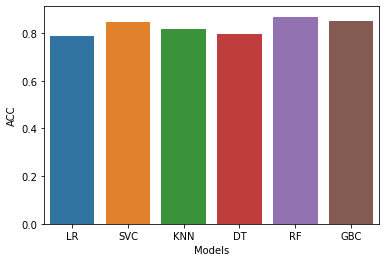

In [65]:
sns.barplot(final_data['Models'],final_data['ACC'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='PRE'>

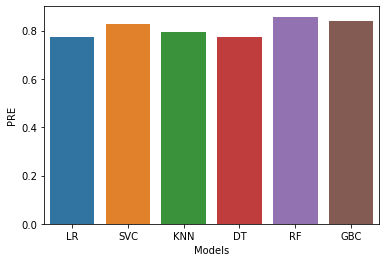

In [66]:
sns.barplot(final_data['Models'],final_data['PRE'])

We can select Random forest model since it has more Precision and acuuracy score.

## Save The Model

In [67]:
X_res = sc.fit_transform(X_res)

In [68]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [69]:
import joblib

In [70]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [71]:
model = joblib.load('churn_predict_model')

In [72]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [73]:
model.predict([[619,42,2,0.0,0,0,0,101348088,0,0,0]])

array([1], dtype=int64)